In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

pd.pandas.set_option("display.max_columns",None)
for dirname, _, filenames in os.walk('./data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./data/survey_lung_cancer.csv
./data/lung_fe.csv


In [3]:
infile = './data/lung_fe.csv'
data = pd.read_csv(infile)
data

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,is_male
0,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1,1
1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1,1
2,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0,0
3,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0,1
4,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,56,0,0,0,1,1,1,0,0,1,1,1,1,0,1,0
305,70,1,0,0,0,0,1,1,1,1,1,1,0,1,1,1
306,58,1,0,0,0,0,0,1,1,1,1,0,0,1,1,1
307,67,1,0,1,0,0,1,1,0,1,1,1,0,1,1,1


In [4]:
X = data.drop('LUNG_CANCER',1)
y = data['LUNG_CANCER']

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
,xtest,ytrain,ytest= train_test_split(X,y,test_size=0.2,random_state=26)

In [12]:
from sklearn.neighbors import KNeighborsClassifier


### Lets try knn

In [15]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(xtrain, ytrain)
model.score(xtest,ytest)

0.8709677419354839

In [38]:
error_rate = []
for i in range(1,11):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(xtrain, ytrain)
    pred_m = model.predict(xtest)
    error_rate.append(np.mean(pred_m != ytest))

Text(0, 0.5, 'Error Rate')

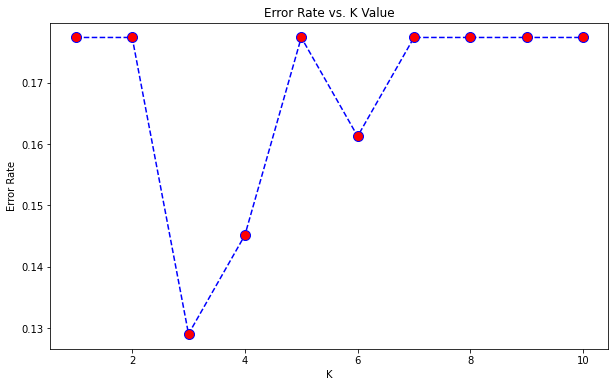

In [39]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### lets do a regular linear regression

In [8]:
from sklearn.linear_model import LogisticRegression,Lasso

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [34]:
models = [LogisticRegression(),
          Lasso(),
          KNeighborsClassifier(n_neighbors=3)]

In [43]:
scale.transform(X)


array([[0.72727273, 0.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.8030303 , 1.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.57575758, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.56060606, 1.        , 0.        , ..., 0.        , 1.        ,
        1.        ],
       [0.6969697 , 1.        , 0.        , ..., 0.        , 1.        ,
        1.        ],
       [0.62121212, 0.        , 0.        , ..., 1.        , 0.        ,
        1.        ]])

In [41]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
train_scale = MinMaxScaler()
train_scale.fit(xtrain)
scale_train = train_scale.transform(xtrain)

test_scale = MinMaxScaler()
test_scale.fit(xtest)
 = test_scale.transform(xtest)


best = 0
best_model = None
for m in models:
    m.fit(scale.transform(scale_train),ytrain)
    score = m.score(test_scale,ytest)
    print(m,score)
    if score > best:
        best = score
        best_model = m
        
print(f"{best_model} has score of {best}")

LogisticRegression() 0.8709677419354839
Lasso() -0.04546050582700878
KNeighborsClassifier(n_neighbors=3) 0.8709677419354839
LogisticRegression() has score of 0.8709677419354839


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
